# Data Understanding and Visualization

In [35]:
# Importing necessary libraries and settings
import time
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import random
from functools import reduce
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy import oauth2

In [36]:
df = pd.read_csv('processed_dataset.csv')
df.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,artist_uri,track_name,album_uri,duration_ms_y,album_name,name,artist_pop,genres,track_pop,id
0,0,0.890,0.672,7.0,-5.532,1.0,0.0621,0.7070,0.000604,0.177,...,spotify:artist:5vCOdeiQt9LyzdI87kt5Sh,Little Swing,spotify:album:4S5MLjwRSi0NJ5nikflYnZ,163809,Little Swing,Party,60,swedish_pop,59,66U0ASk1VHZsqIkpMjKX3B
1,1,0.883,0.817,0.0,-5.414,1.0,0.2350,0.6010,0.004490,0.110,...,spotify:artist:5vCOdeiQt9LyzdI87kt5Sh,I'm an Albatraoz,spotify:album:1qHVYbxQ6IS8YRviorKDJI,166848,I'm an Albatraoz,Party,60,swedish_pop,72,5MhsZlmKJG6X5kTHkdwC4B
2,2,0.586,0.626,1.0,-8.448,1.0,0.0356,0.0874,0.000380,0.113,...,spotify:artist:163tK9Wjr9P9DmM0AVK7lm,Yellow Flicker Beat - From The Hunger Games: M...,spotify:album:4UEPxQx0cTcYNsE0n32MHV,232506,Yellow Flicker Beat,Party,75,art_pop metropopolis nz_pop pop,0,0GZoB8h0kqXn7XFm4Sj06k
3,3,0.654,0.304,6.0,-9.067,0.0,0.0358,0.6470,0.000072,0.147,...,spotify:artist:163tK9Wjr9P9DmM0AVK7lm,White Teeth Teens,spotify:album:0rmhjUgoVa17LZuS8xWQ3v,216600,Pure Heroine,Party,75,art_pop metropopolis nz_pop pop,58,35kahykNu00FPysz3C2euR
4,4,0.690,0.578,6.0,-7.436,1.0,0.0929,0.1670,0.000000,0.305,...,spotify:artist:163tK9Wjr9P9DmM0AVK7lm,Team,spotify:album:0rmhjUgoVa17LZuS8xWQ3v,193058,Pure Heroine,Party,75,art_pop metropopolis nz_pop pop,76,3G6hD9B2ZHOsgf4WfNu7X1


In [37]:
df['track_uri'].value_counts()

66U0ASk1VHZsqIkpMjKX3B    1
6q5AAv5tGYScc7NF2kBoBi    1
1vNpOwhZbTDWelxsSceBaB    1
3hr4wbMPJIRWsbzh064qXR    1
4G0AYabT91GhjqVdIdBwWH    1
                         ..
5OB2TCSfx1T3zb3G0X0jxl    1
3jZFiM1wSrfY5MpUEVDlx9    1
47aEKbvbgAD3cPoorJQzj1    1
7cKLOenzViwzoHJWciMIrj    1
5RVuBrXVLptAEbGJdSDzL5    1
Name: track_uri, Length: 81428, dtype: int64

C:\Users\Checkout\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


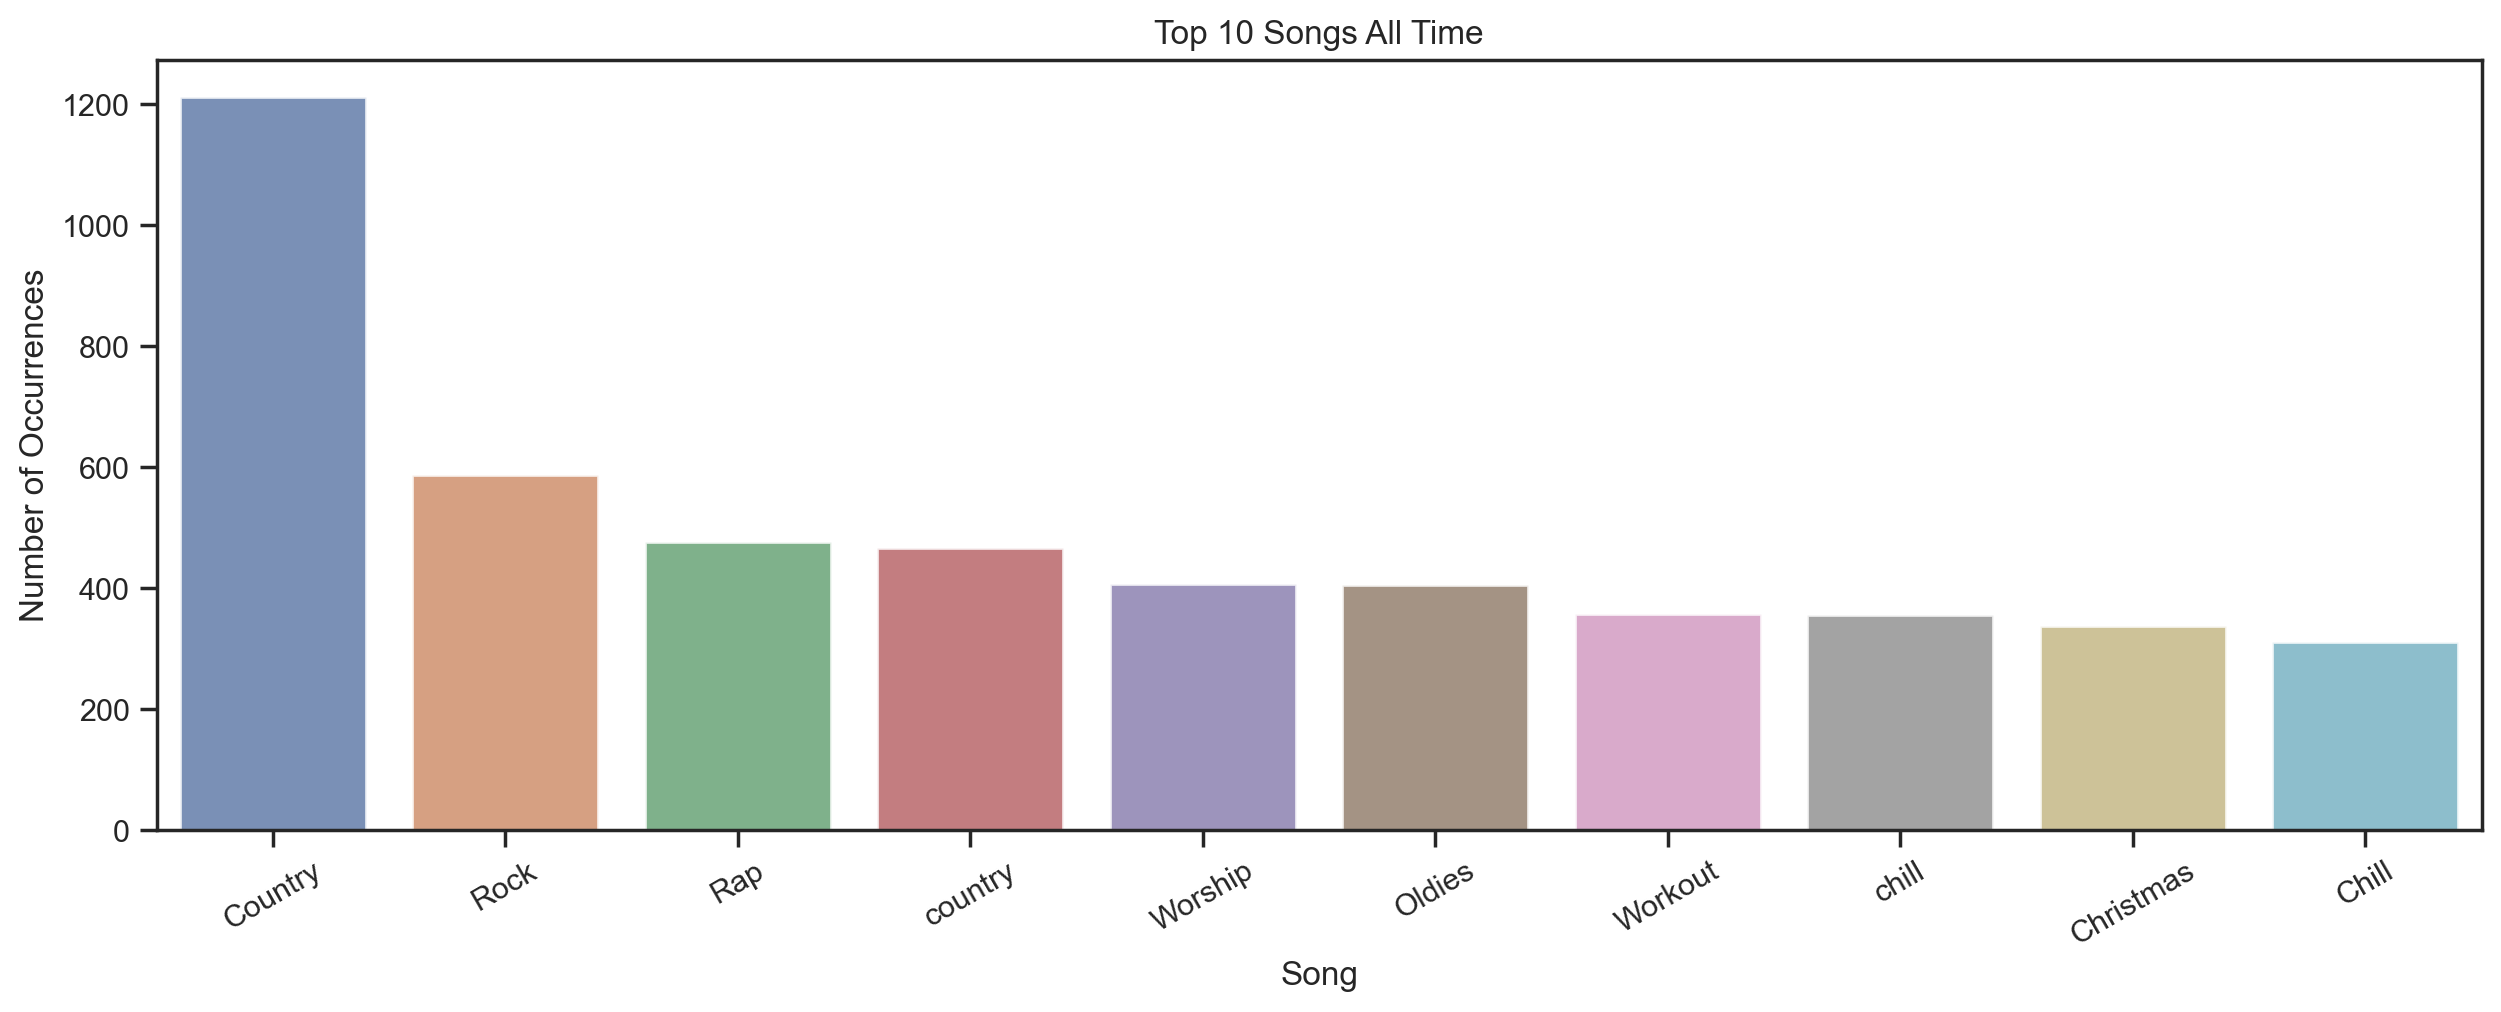

In [39]:
# Most listened songs of all time?
song_counts  = df['name'].value_counts()
song_counts = song_counts[:10,]
plt.figure(figsize=(16,5))

chart = sns.barplot(song_counts.index, song_counts.values, alpha=0.8)
plt.title('Top 10 Songs All Time')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Song', fontsize=12)

xticks=chart.xaxis.get_major_ticks()
chart.set_xticklabels(song_count.index, rotation=30)

plt.show()

C:\Users\Checkout\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Glee Cast'),
  Text(1, 0, 'Eminem'),
  Text(2, 0, 'Pearl Jam'),
  Text(3, 0, 'Future'),
  Text(4, 0, 'Drake'),
  Text(5, 0, 'The Beatles'),
  Text(6, 0, 'Chris Brown'),
  Text(7, 0, 'Kanye West'),
  Text(8, 0, 'Taylor Swift'),
  Text(9, 0, 'Lil Wayne'),
  Text(10, 0, 'George Strait'),
  Text(11, 0, 'Beyoncé'),
  Text(12, 0, 'Rihanna'),
  Text(13, 0, 'Coldplay'),
  Text(14, 0, 'John Mayer'),
  Text(15, 0, 'Gucci Mane'),
  Text(16, 0, 'Justin Bieber'),
  Text(17, 0, 'Kenny Chesney'),
  Text(18, 0, 'Tegan and Sara'),
  Text(19, 0, '2Pac')])

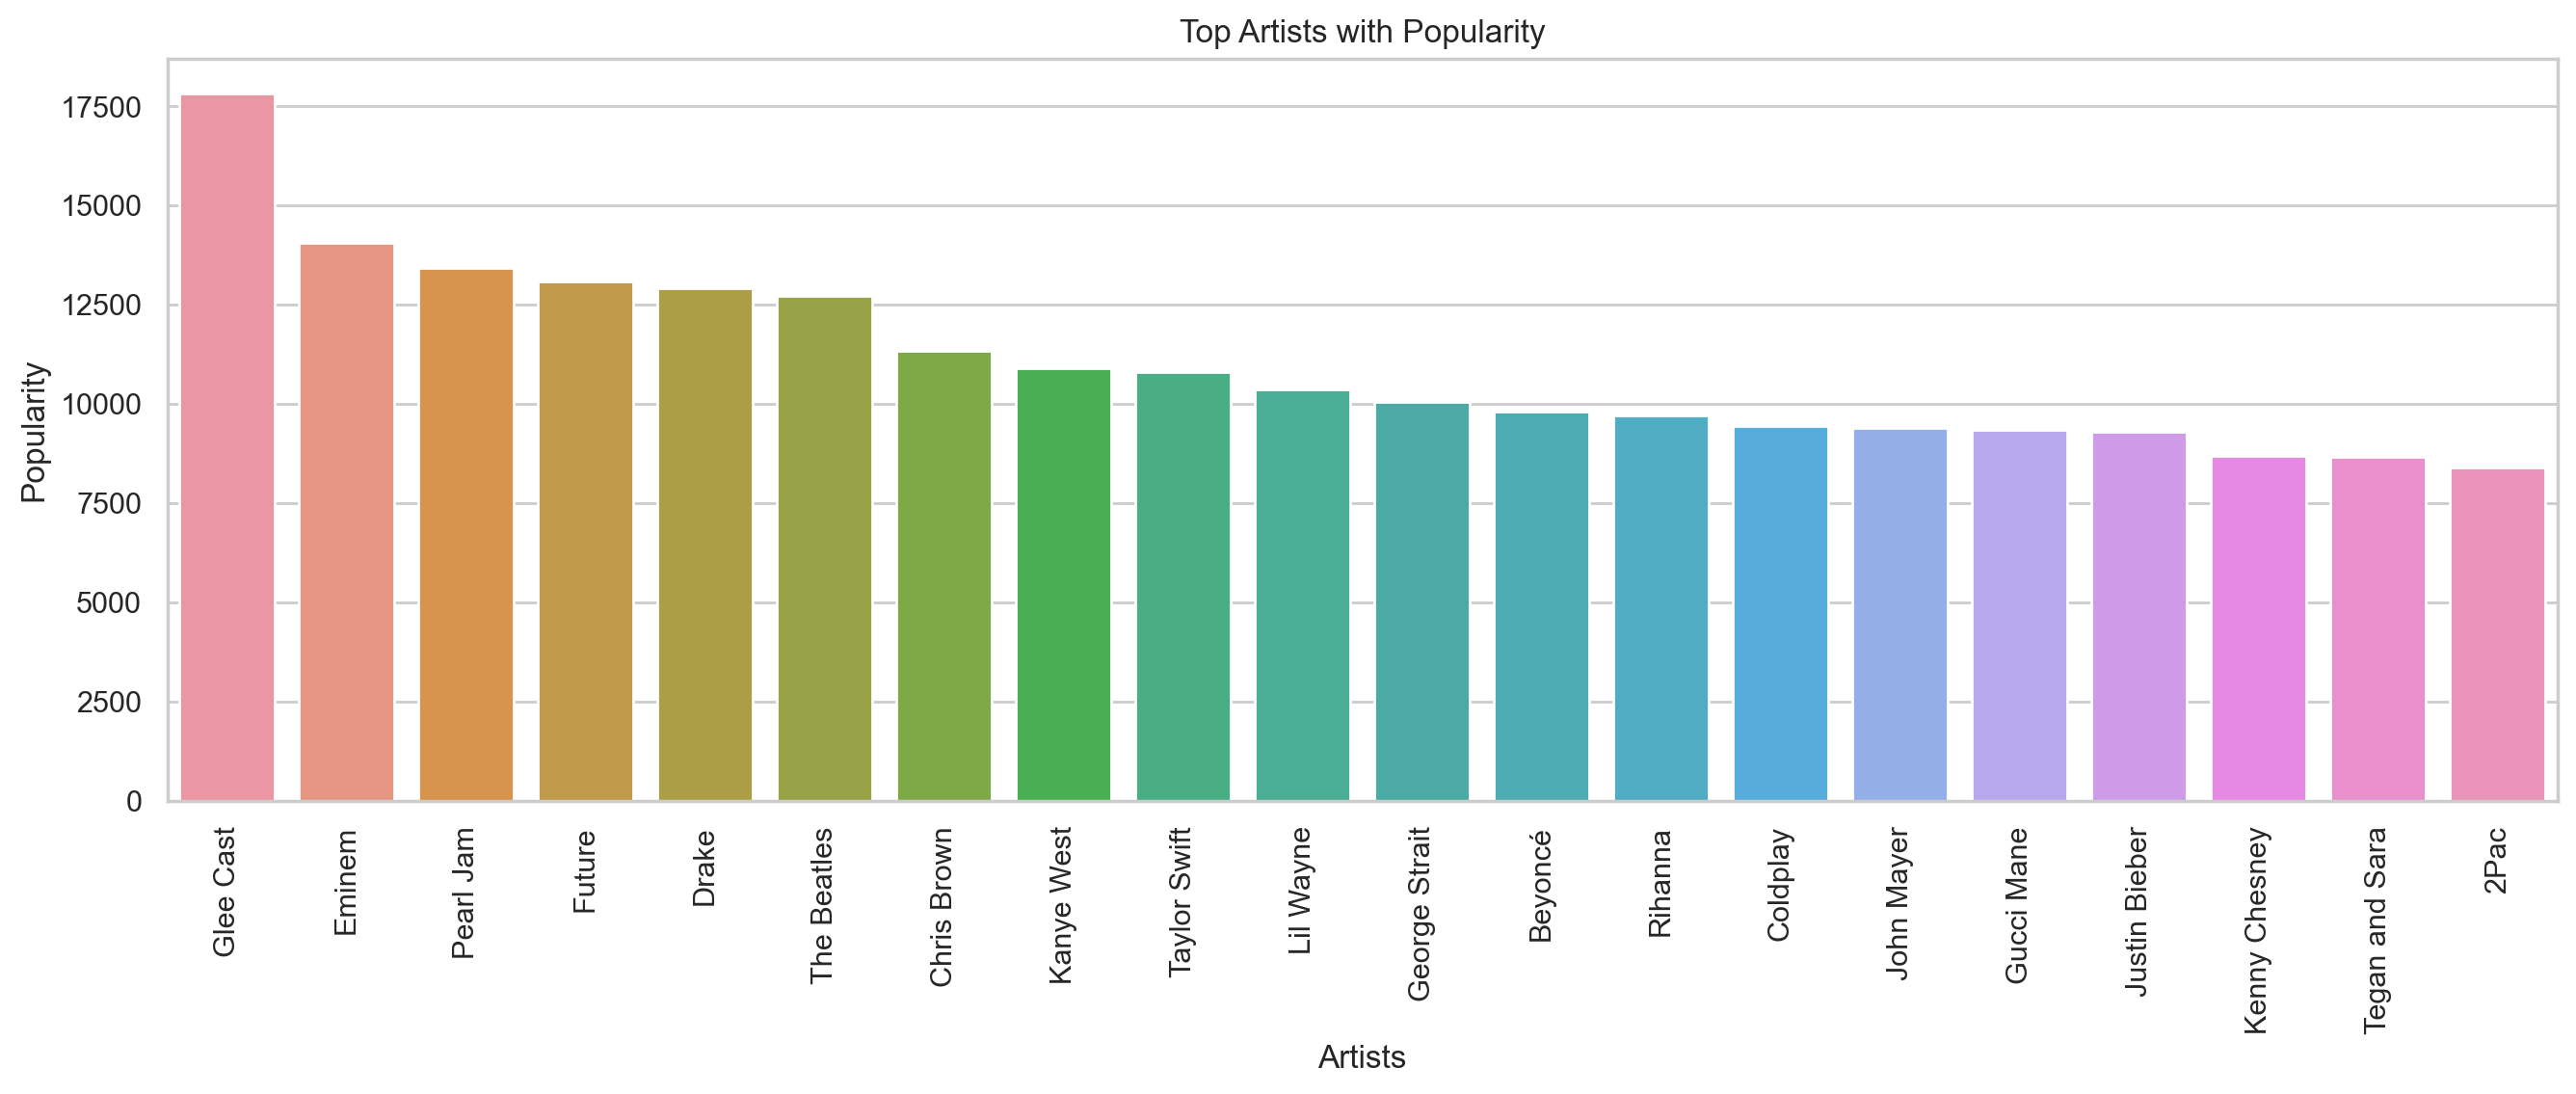

In [44]:
# Most artist listened to of all time?
plt.figure(figsize=(16, 5))
x = df.groupby("artist_name")["artist_pop"].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x.index, x)
ax.set_title('Top Artists with Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)

C:\Users\Checkout\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Popularity Distribution')

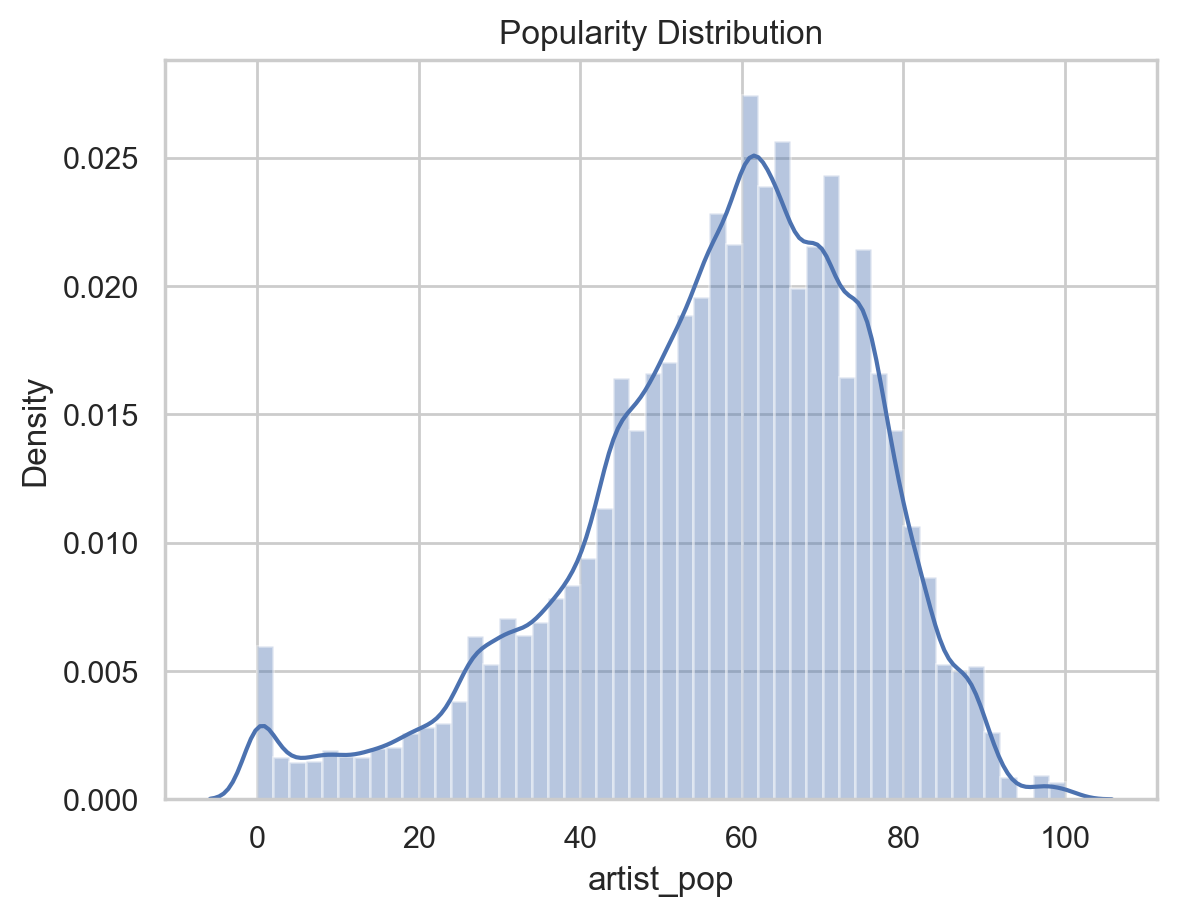

In [45]:
sns.distplot(df['artist_pop']).set_title('Popularity Distribution')

In [12]:
# Create new column with total length of song in minutes
df['total_minutes'] = df['duration_ms_x'] / 60000

In [13]:
# amount of time spent listening to the most popular artist
amount_of_time = df.groupby(by='artist_name')['total_minutes'].sum().sort_values(ascending=False)[:15]
amount_of_time

artist_name
Glee Cast             854.614700
Pearl Jam             788.394950
Eminem                667.190550
Hillsong United       611.852667
Dave Matthews Band    582.037433
John Mayer            565.917767
Drake                 555.666433
Future                541.815800
Hillsong Worship      539.539383
Lil Wayne             519.773733
Chris Brown           510.454083
Kenny Chesney         505.656283
Kanye West            491.998417
Bruce Springsteen     486.439500
Coldplay              470.843167
Name: total_minutes, dtype: float64

[Text(0.5, 1.0, 'Coorelations Between Song Features')]

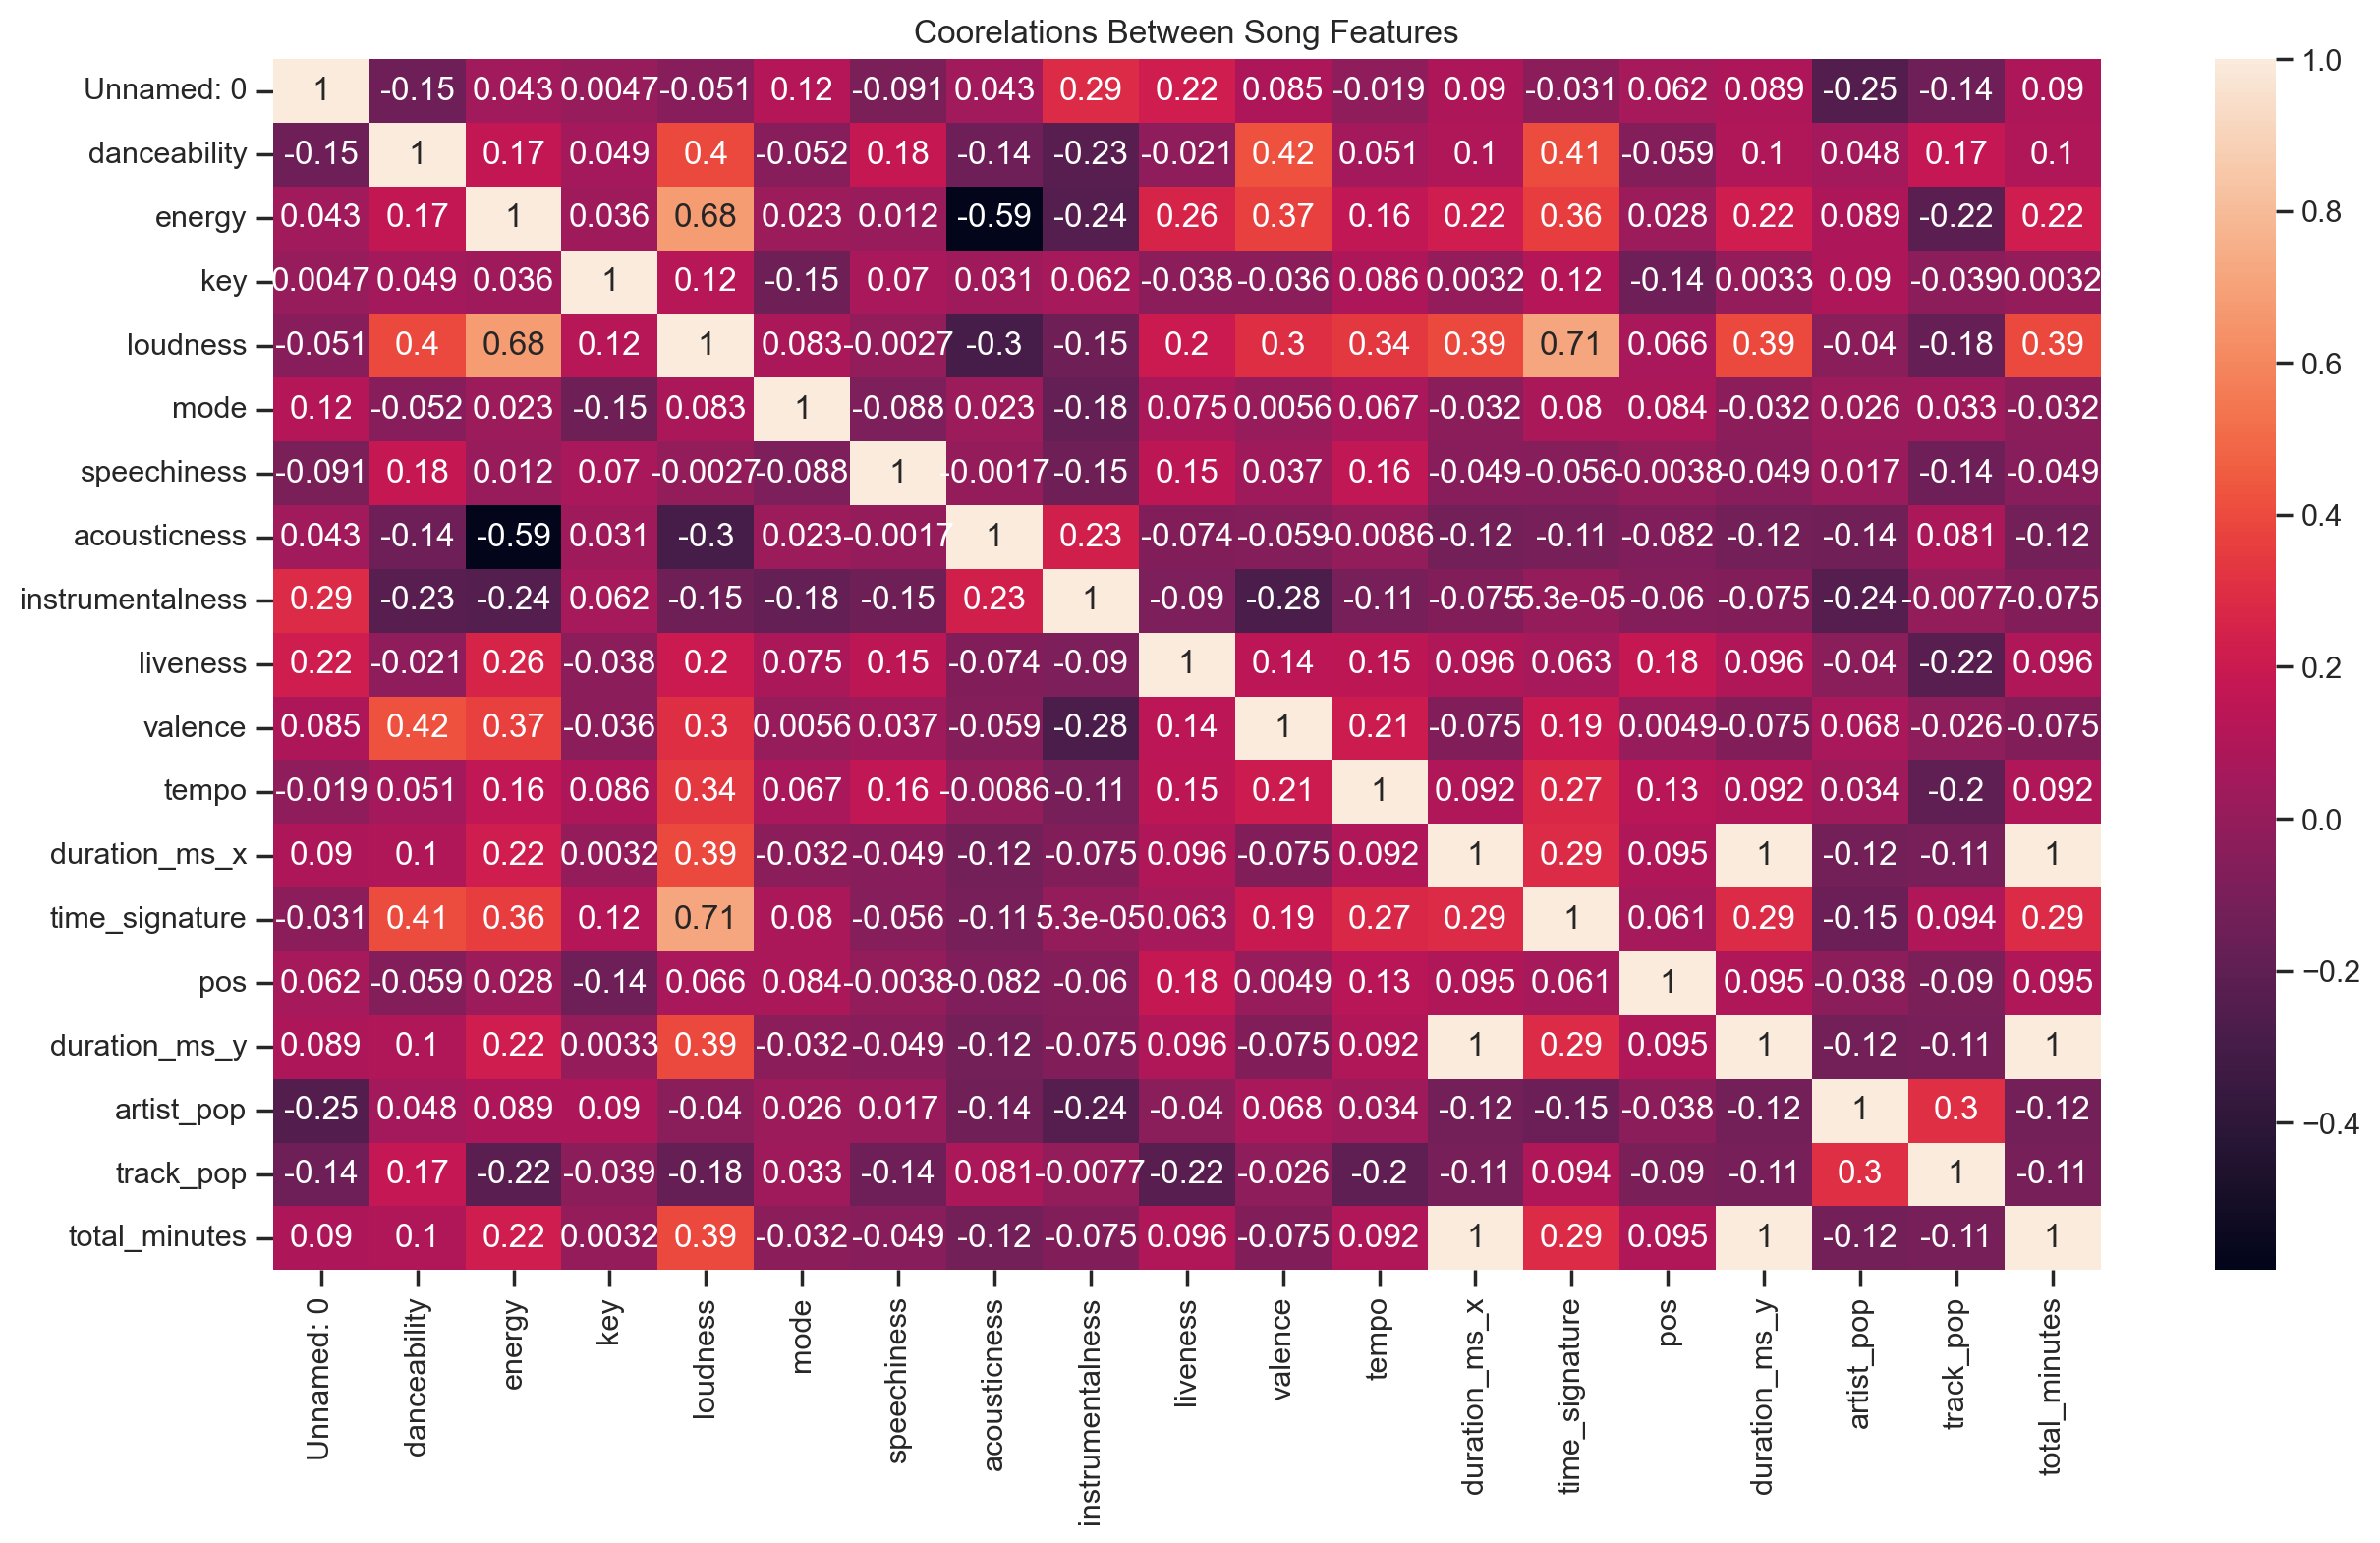

In [28]:
# Understanding how song features relate
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True).set(title='Coorelations Between Song Features')

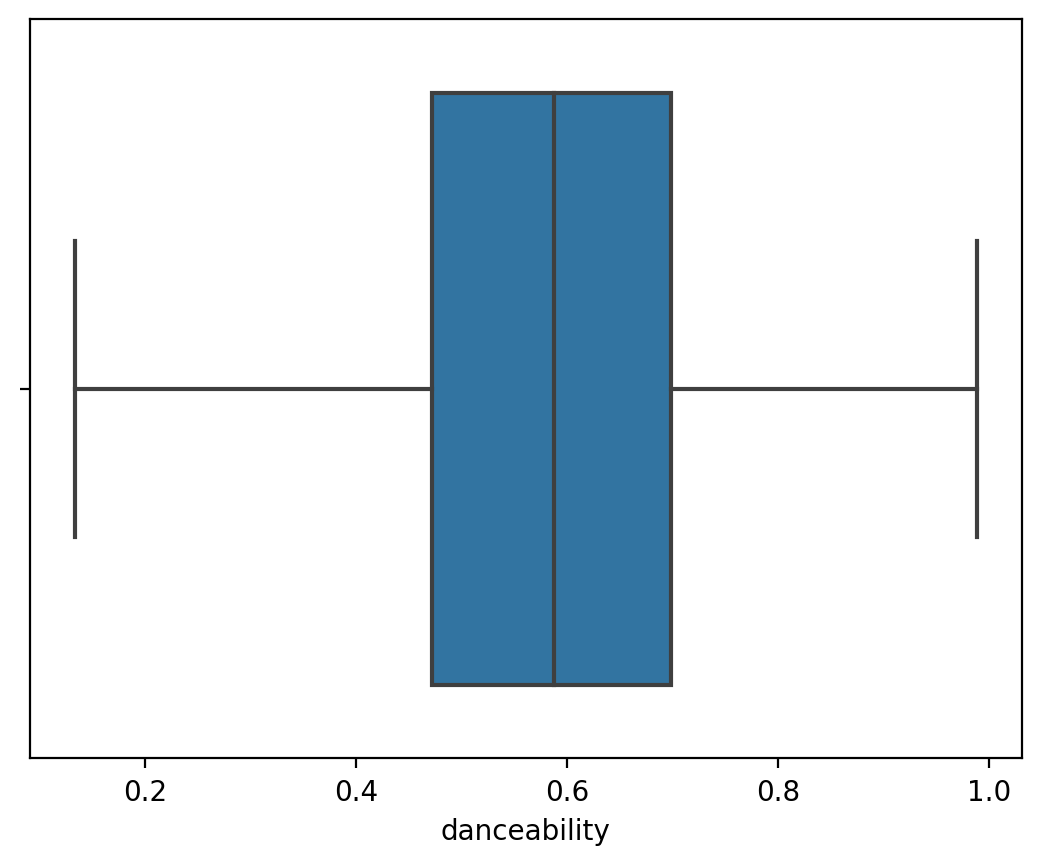

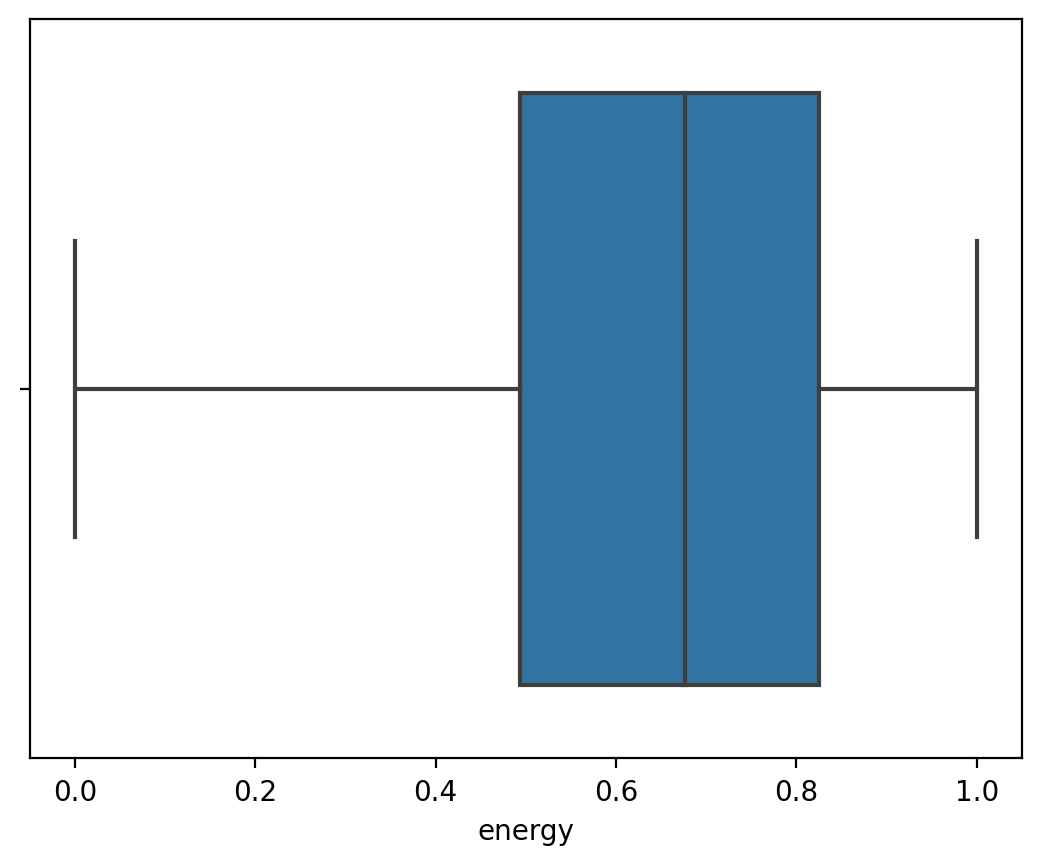

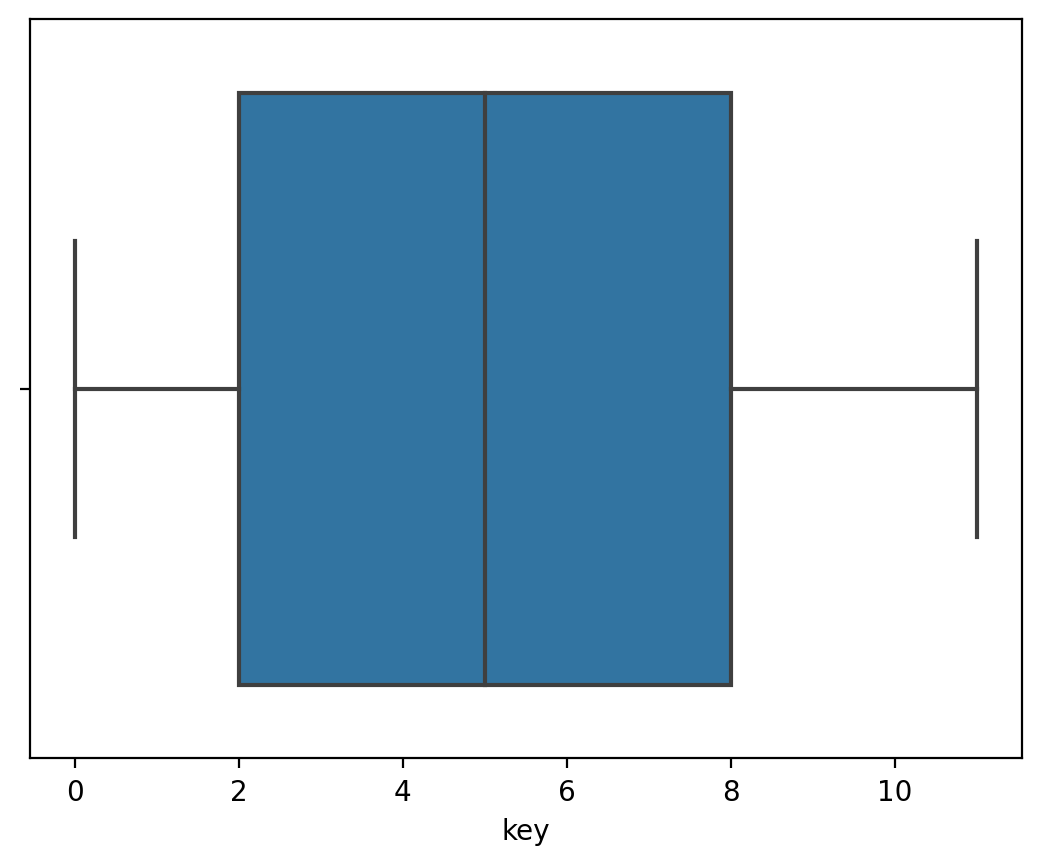

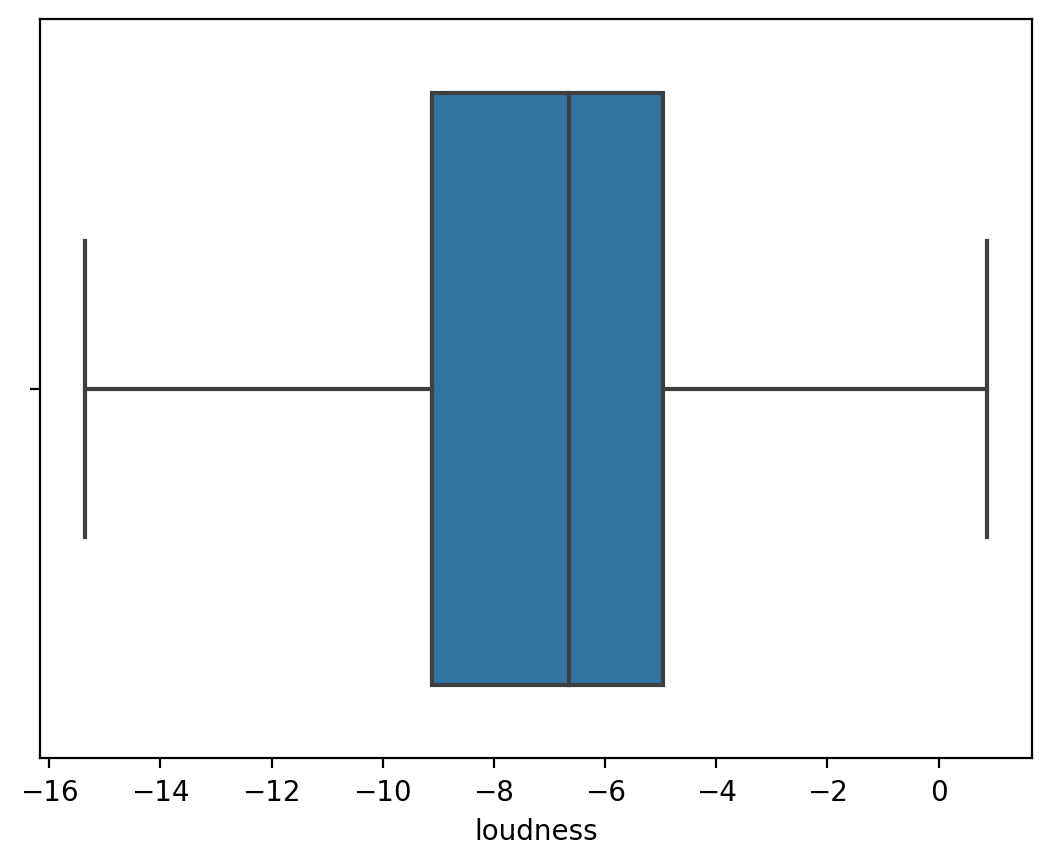

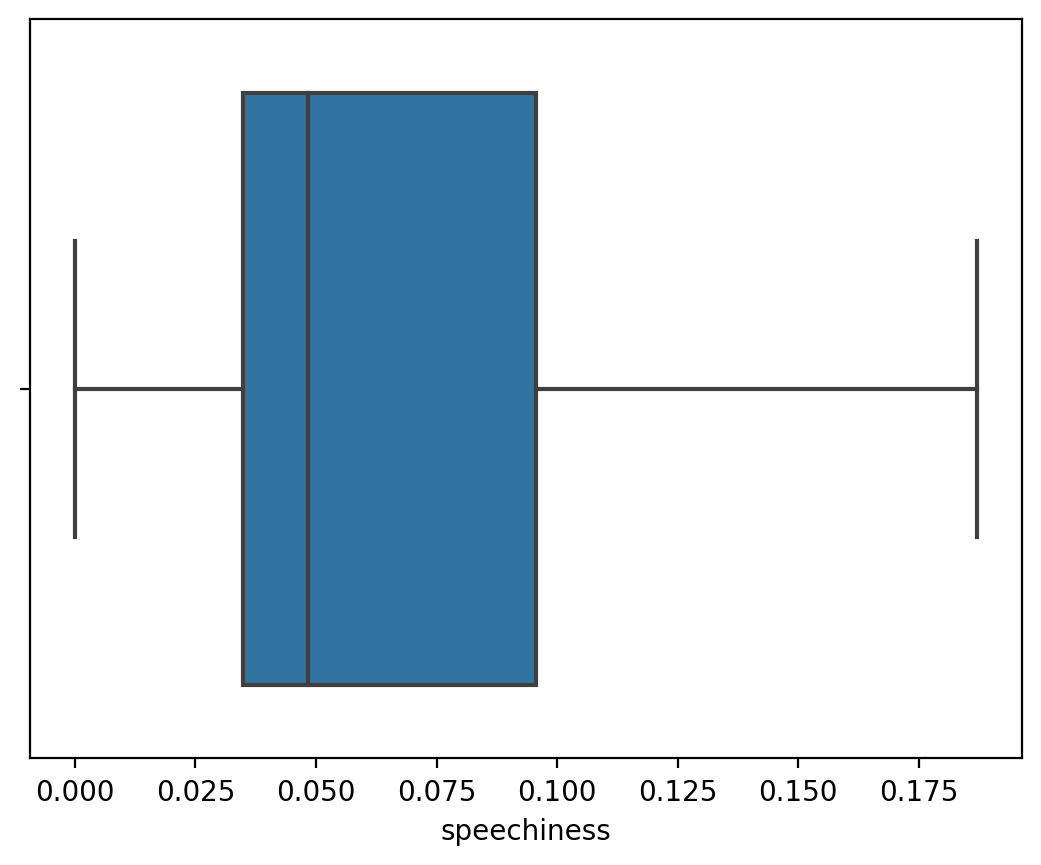

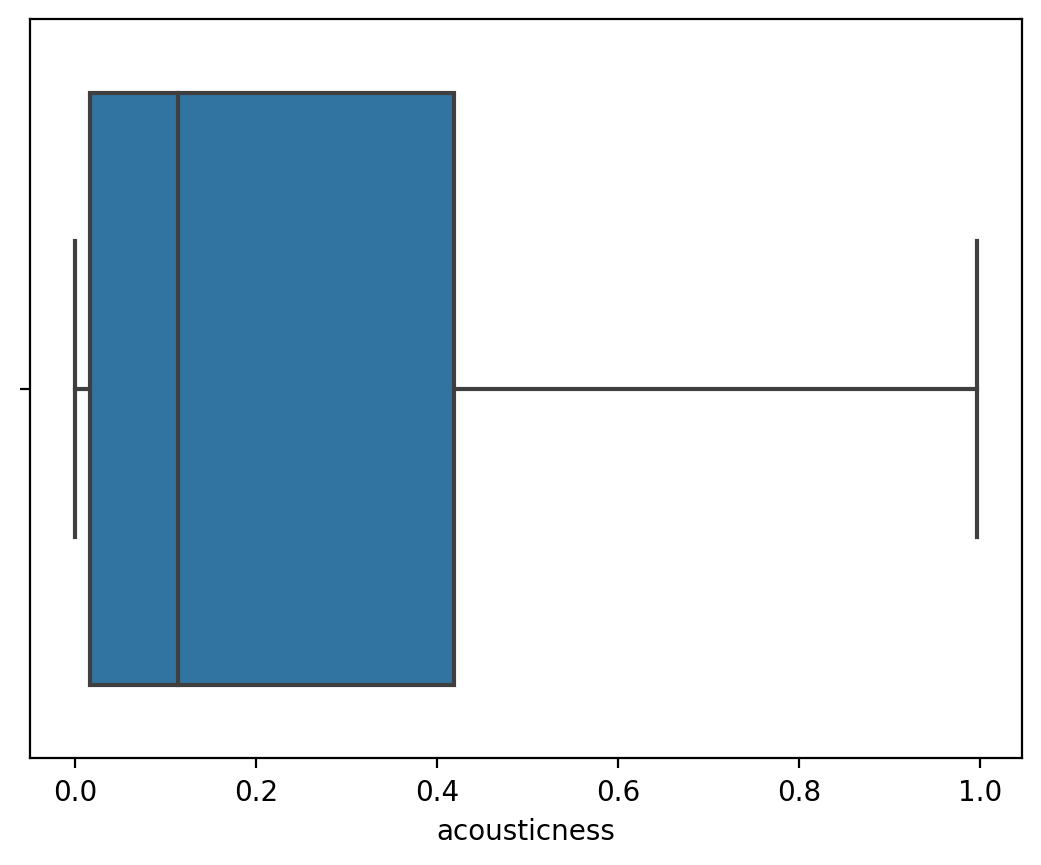

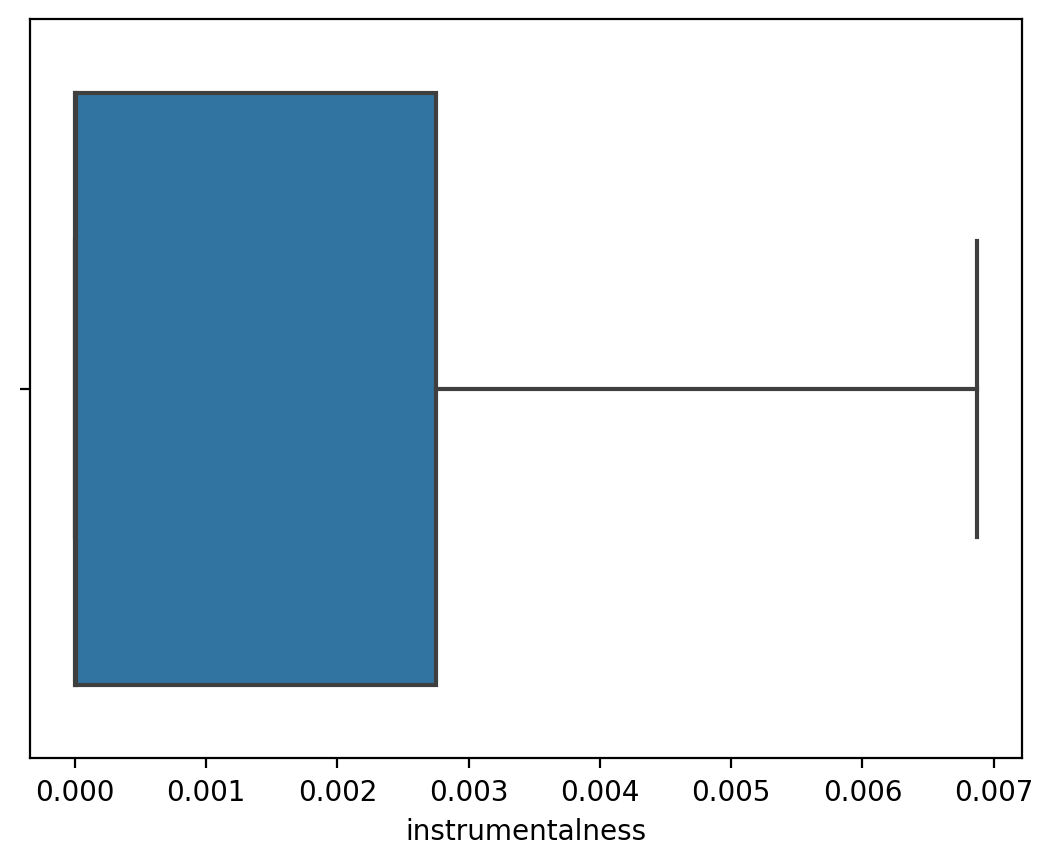

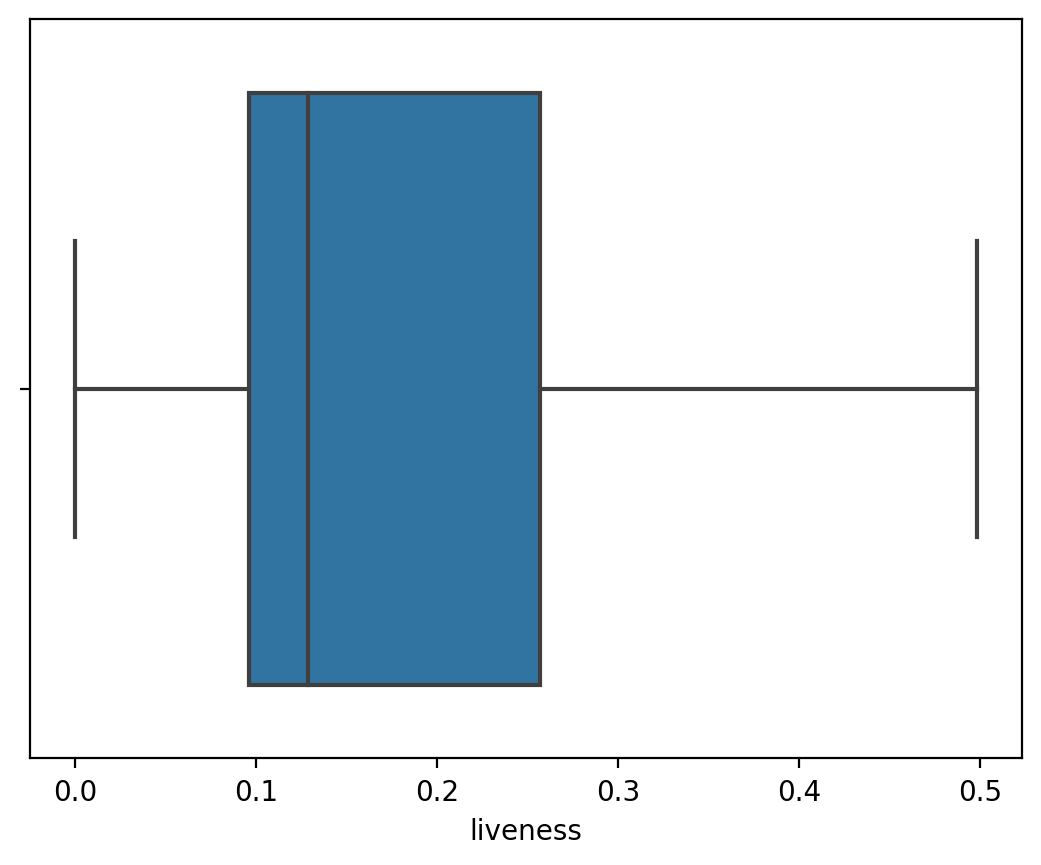

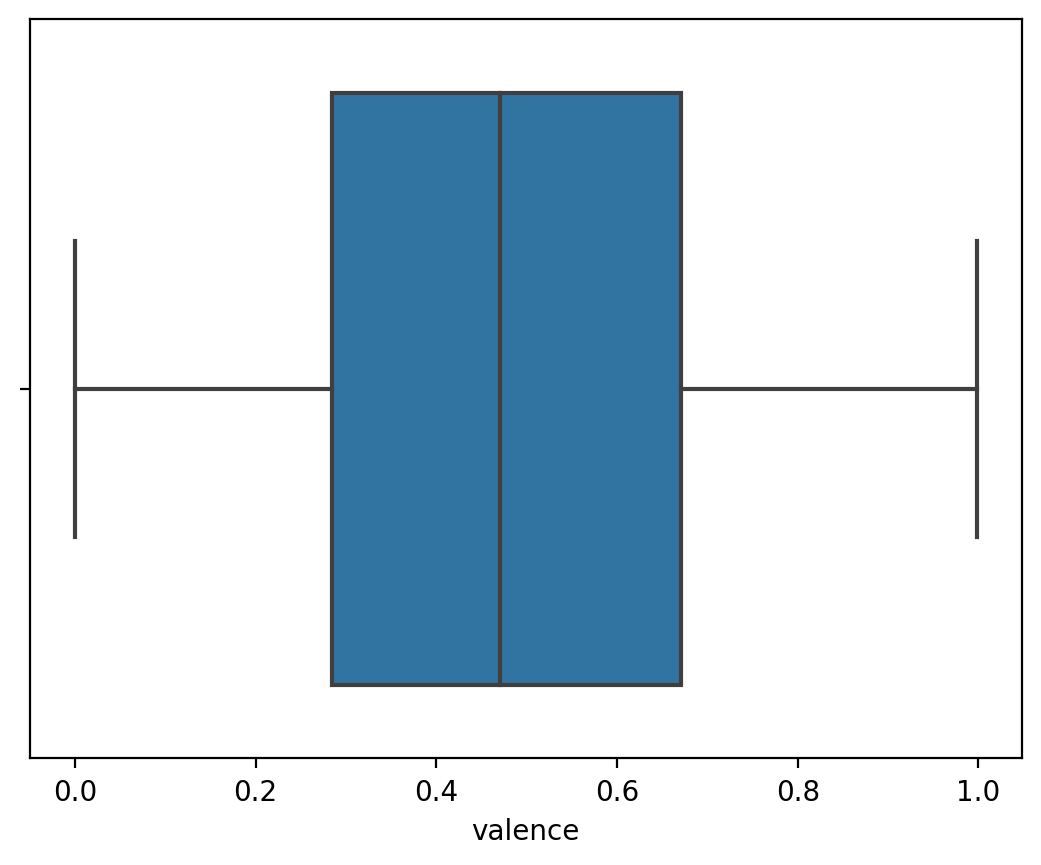

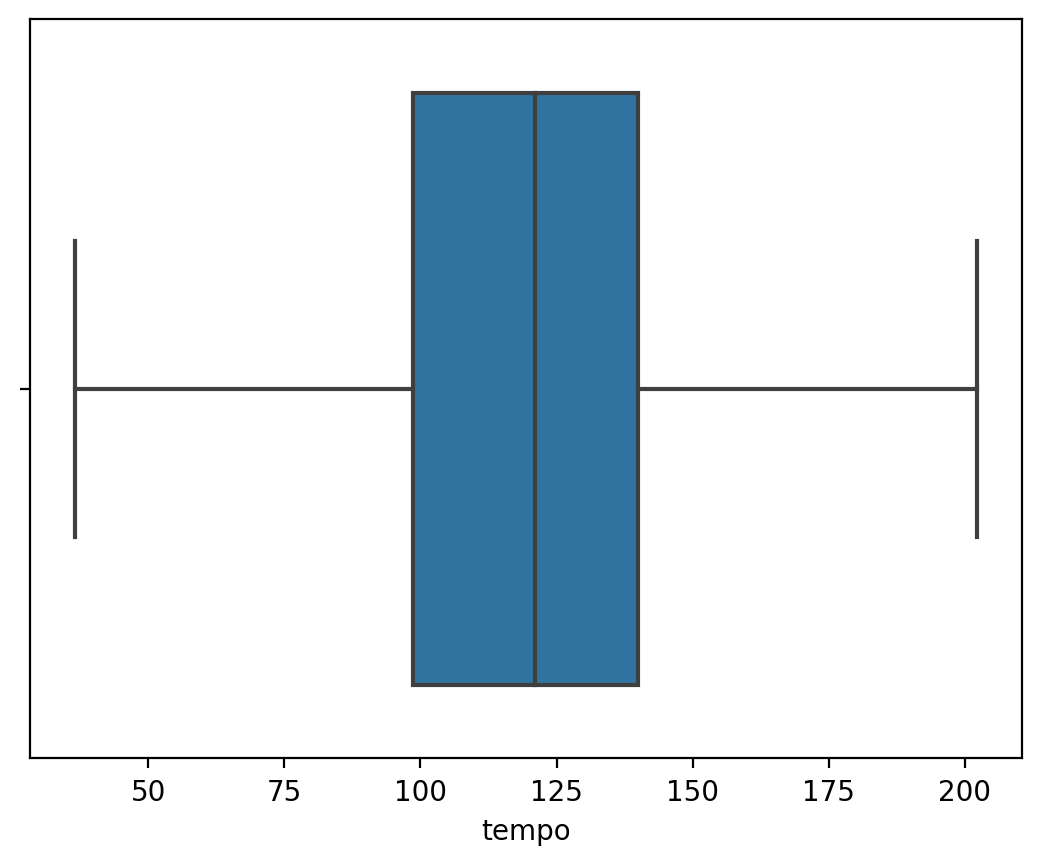

In [18]:
# What is the average value for each audio feature?
audio_features = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
for feature in audio_features:
    sns.boxplot(showfliers = False, x=df[feature])
    plt.show()

In [20]:
# Creating a new dataframe with audio features of top 100 songs
song_counts = df['name'].value_counts()[:100]
df = df.loc[df['name'].isin(song_counts.index)].drop_duplicates(subset=['name'])
df.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,track_name,album_uri,duration_ms_y,album_name,name,artist_pop,genres,track_pop,id,total_minutes
0,0,0.890,0.672,7.0,-5.532,1.0,0.0621,0.707000,0.000604,0.177,...,Little Swing,spotify:album:4S5MLjwRSi0NJ5nikflYnZ,163809,Little Swing,Party,60,swedish_pop,59,66U0ASk1VHZsqIkpMjKX3B,2.730167
35,35,0.647,0.673,5.0,-5.992,1.0,0.1760,0.172000,0.000000,0.223,...,Wake Up,spotify:album:7vhZcSEXGx8dHt1O5coI7Z,224000,Wake Up,Dance,69,dance_pop new_jersey_rap pop pop_rap rap south...,50,6BOtDFg6GJm0rPUDuNmx57,3.733333
44,44,0.550,0.854,3.0,-5.968,1.0,0.0360,0.661000,0.000000,0.112,...,Surfin' U.S.A.,spotify:album:6u5tGarzvESDsQiIpC4SlI,149373,Surfin' USA,Oldies,71,baroque_pop brill_building_pop classic_rock ps...,71,0wz1LjDb9ZNEYwOmDJ3Q4b,2.489550
148,148,0.500,0.748,4.0,-9.072,1.0,0.0363,0.127000,0.000000,0.447,...,Don't Stop Believin',spotify:album:43wpzak9OmQfrjyksuGwp0,250986,Escape,oldies,73,album_rock classic_rock hard_rock mellow_gold ...,82,4bHsxqR3GMrXTxEPLuK5ue,4.183117
263,263,0.296,0.912,5.0,-3.433,1.0,0.0645,0.000034,0.002640,0.389,...,Happy Song,spotify:album:6XPW94L30lADaLwczUnLFh,239293,That's The Spirit,rock,76,melodic_metalcore metalcore rock uk_metalcore,0,4Smc57rqnTjKvz56WJaunv,3.988217


[Text(0.5, 1.0, 'Coorelations between audio features')]

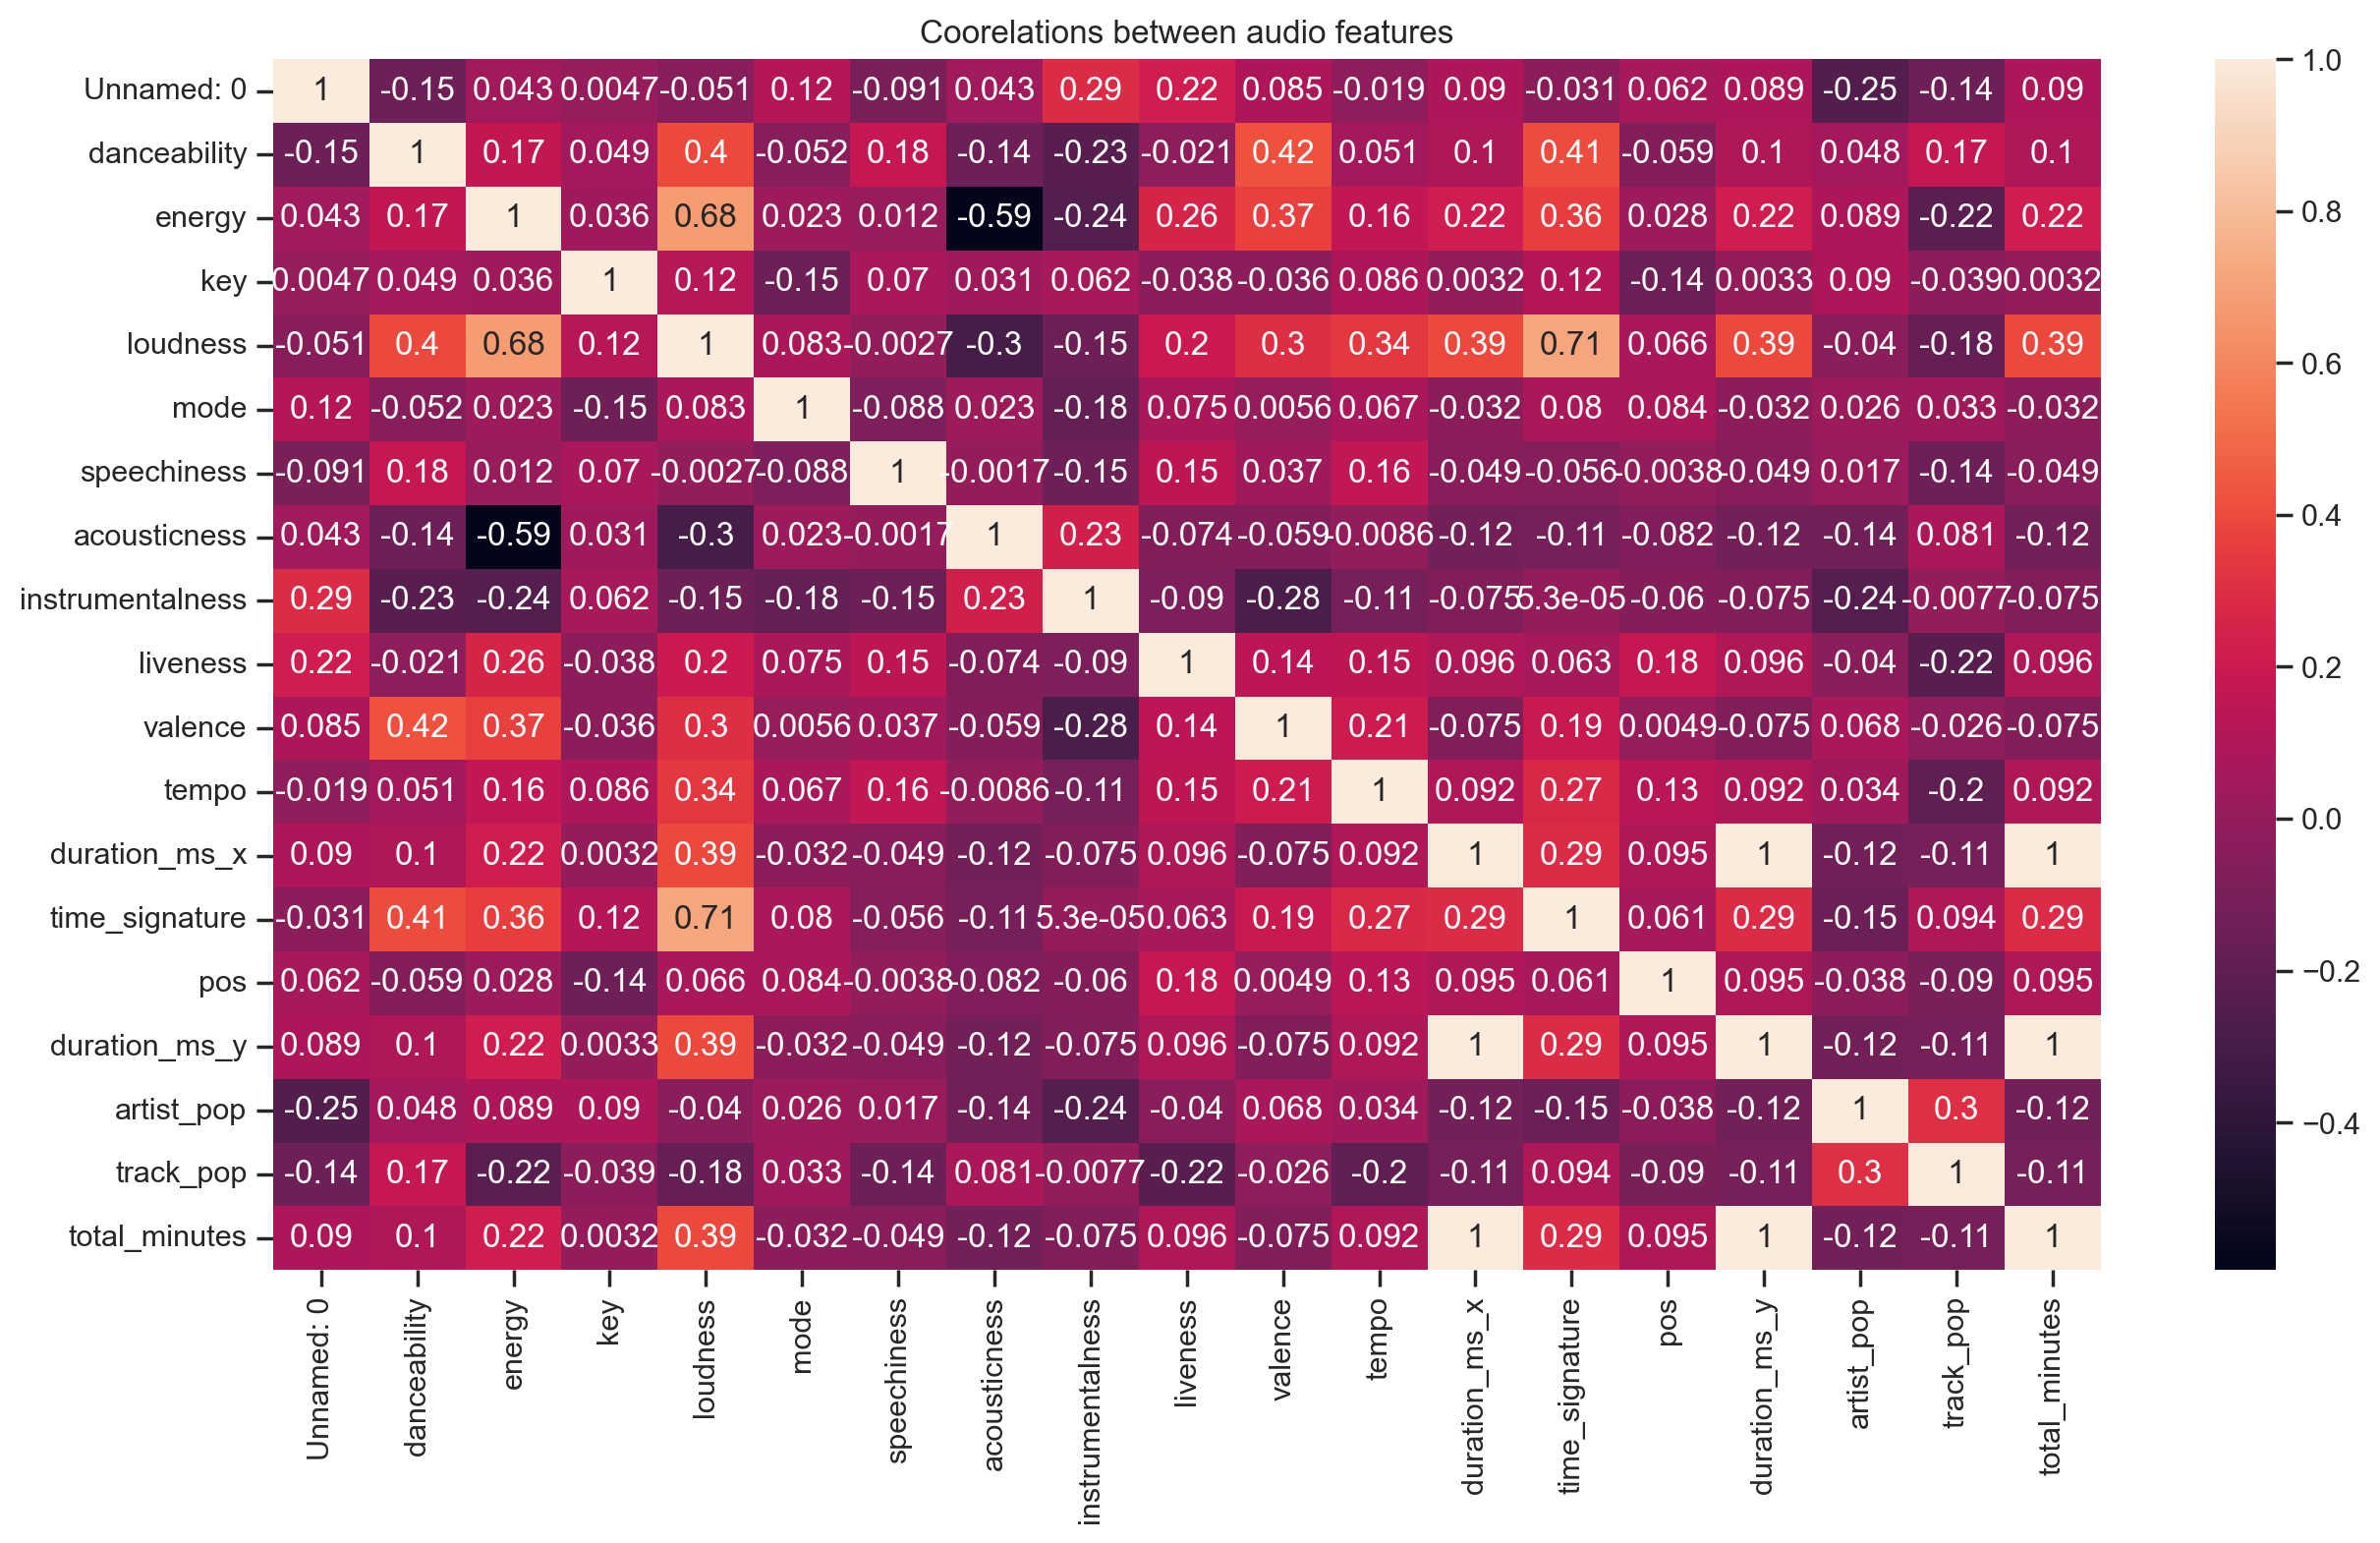

In [27]:
# Understanding how song features relate in the top 100
corr = df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True).set(title='Coorelations between audio features')

C:\Users\Checkout\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Tracks')

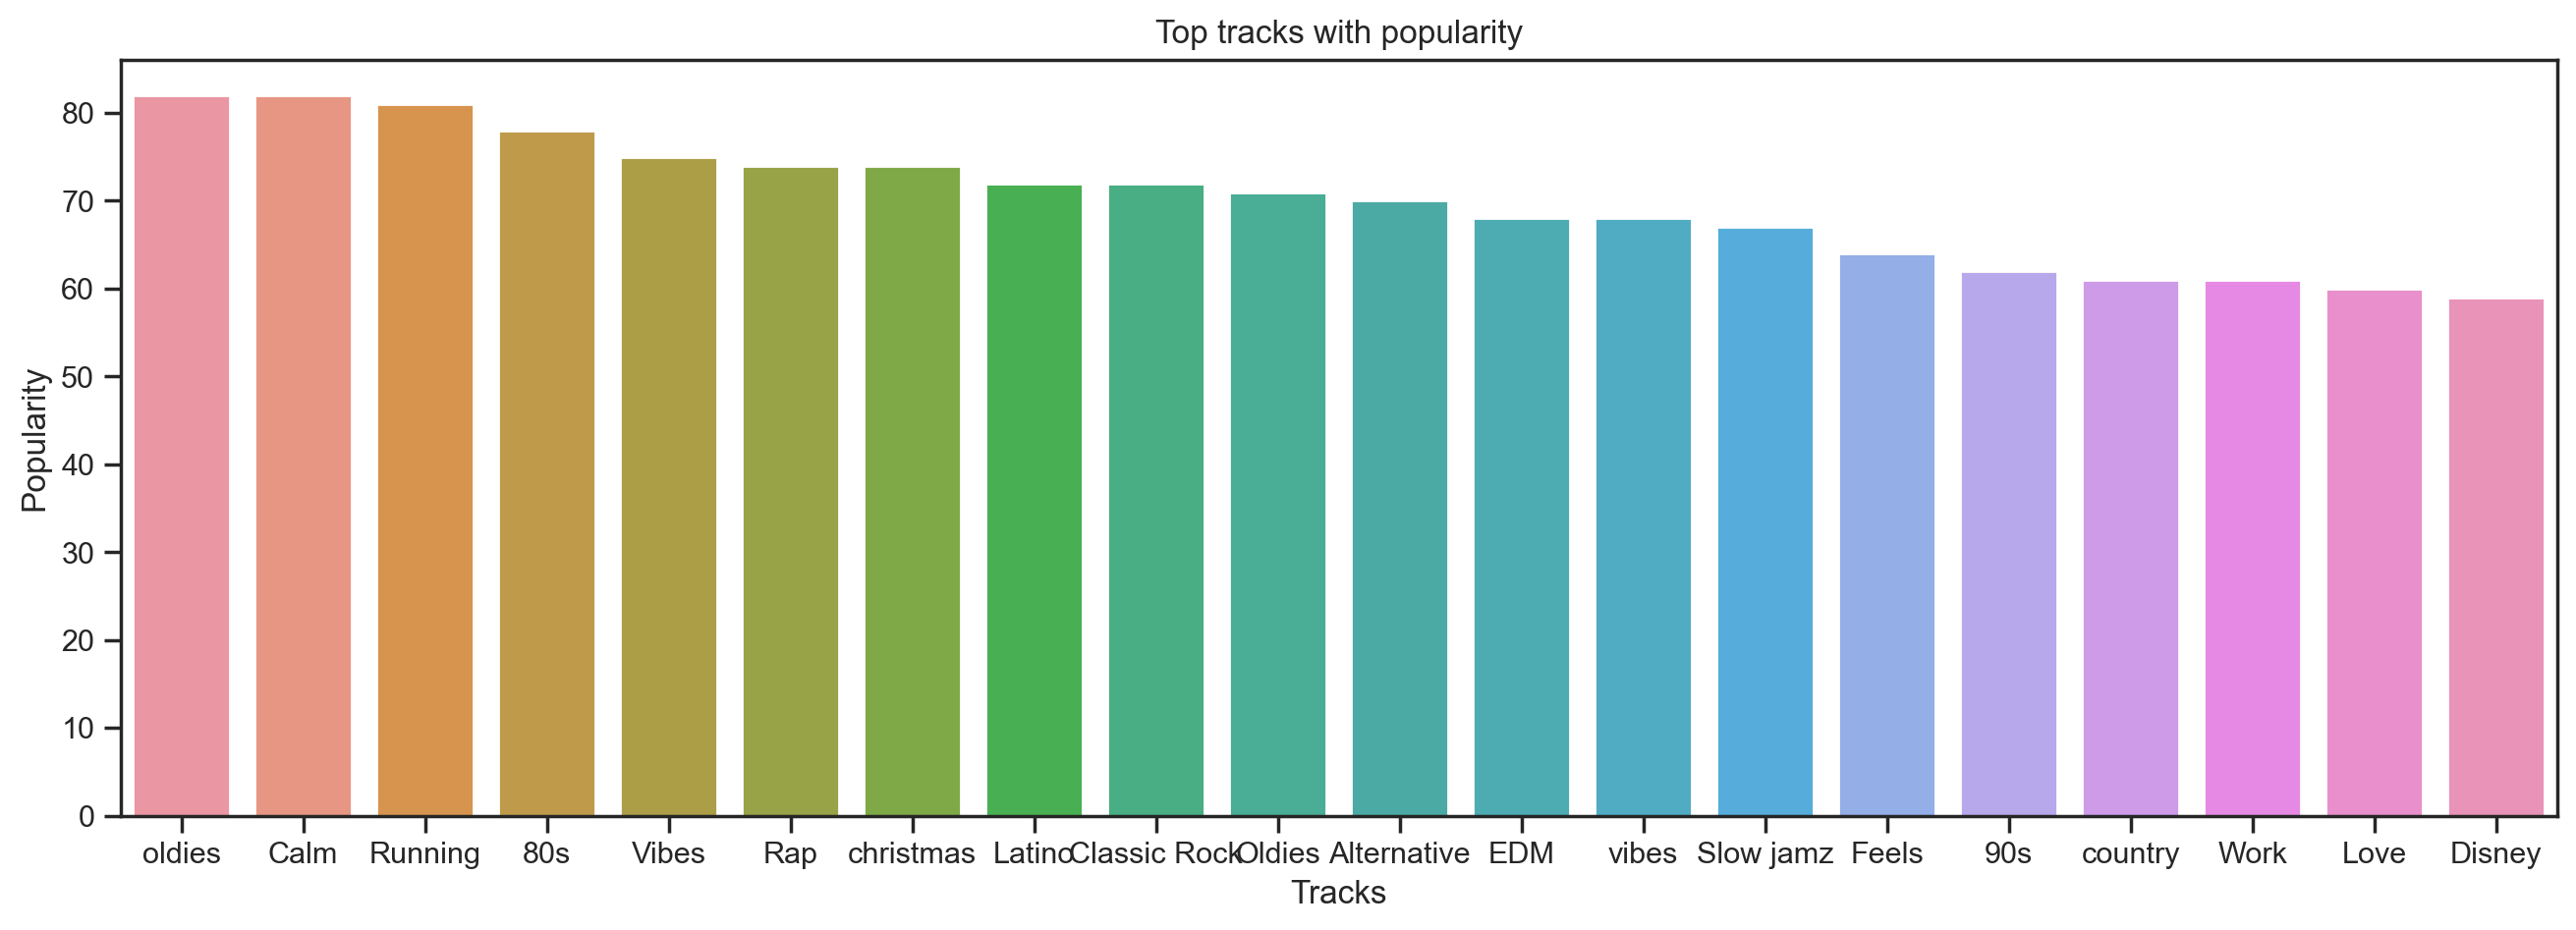

In [25]:
plt.figure(figsize=(16, 5))
sns.set(style="ticks")
x_set = df.groupby("name")["track_pop"].mean().sort_values(ascending=False).head(20)
axis = sns.barplot(x_set.index, x_set)
axis.set_title('Top tracks with popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')